# 1. Clasificación de carpetas por patología

In [3]:
import os
import pandas as pd

# Ruta del archivo CSV
csv_train = "bcn_20k_train.csv"

# Cargar los datos
df_train = pd.read_csv(csv_train)

# Mostrar algunas filas
print(df_train.head())

# Esto te permitirá ver cómo están organizadas las etiquetas. 
# Normalmente, el CSV tendrá columnas como "image_name" (nombre del archivo de la imagen) 
# y "label" (la clase a la que pertenece la imagen).

         bcn_filename  age_approx anatom_site_general diagnosis    lesion_id  \
0  BCN_0000000001.jpg        55.0      anterior torso       MEL  BCN_0003884   
1  BCN_0000000003.jpg        50.0      anterior torso       MEL  BCN_0000019   
2  BCN_0000000004.jpg        85.0           head/neck       SCC  BCN_0003499   
3  BCN_0000000006.jpg        60.0      anterior torso        NV  BCN_0003316   
4  BCN_0000000010.jpg        30.0      anterior torso       BCC  BCN_0004874   

  capture_date     sex  split  
0   2012-05-16    male  train  
1   2015-07-09  female  train  
2   2015-11-23    male  train  
3   2015-06-16    male  train  
4   2014-02-18  female  train  


In [4]:
import os
import shutil
import pandas as pd
import re

# Ruta donde están las imágenes originales
carpeta_imagenes = 'bcn_20k_train'  # <-- cambia esta ruta

# Cargar el CSV que contiene el nombre de archivo e información de diagnóstico
df = pd.read_csv('bcn_20k_train.csv')  # <-- cambia esta ruta

# Reemplazar valores nulos por 'unknown'
df['diagnosis'] = df['diagnosis'].fillna('unknown')

# Función para limpiar nombres de carpeta
def limpiar_nombre(nombre):
    return re.sub(r'[^\w\-_. ]', '_', str(nombre).strip())

# Ruta de salida
output_folder = 'imagenes_clasificadas_BCN20000'

# Crear carpeta base si no existe
os.makedirs(output_folder, exist_ok=True)

# Procesar cada imagen
for _, fila in df.iterrows():
    nombre_archivo = fila['bcn_filename']  # <-- columna con el nombre del archivo de imagen
    categoria = limpiar_nombre(fila['diagnosis'])

    carpeta_destino = os.path.join(output_folder, categoria)
    os.makedirs(carpeta_destino, exist_ok=True)

    ruta_origen = os.path.join(carpeta_imagenes, nombre_archivo)
    ruta_destino = os.path.join(carpeta_destino, nombre_archivo)

    try:
        shutil.copy2(ruta_origen, ruta_destino)
        print(f"Copiada: {nombre_archivo} → {categoria}")
    except FileNotFoundError:
        print(f"❌ Archivo no encontrado: {ruta_origen}")

Copiada: BCN_0000000001.jpg → MEL
Copiada: BCN_0000000003.jpg → MEL
Copiada: BCN_0000000004.jpg → SCC
Copiada: BCN_0000000006.jpg → NV
Copiada: BCN_0000000010.jpg → BCC
Copiada: BCN_0000000011.jpg → NV
Copiada: BCN_0000000013.jpg → NV
Copiada: BCN_0000000014.jpg → BKL
Copiada: BCN_0000000016.jpg → MEL
Copiada: BCN_0000000017.jpg → MEL
Copiada: BCN_0000000019.jpg → BCC
Copiada: BCN_0000000020.jpg → MEL
Copiada: BCN_0000000021.jpg → BCC
Copiada: BCN_0000000022.jpg → SCC
Copiada: BCN_0000000025.jpg → AK
Copiada: BCN_0000000026.jpg → MEL
Copiada: BCN_0000000029.jpg → NV
Copiada: BCN_0000000030.jpg → BCC
Copiada: BCN_0000000031.jpg → BKL
Copiada: BCN_0000000032.jpg → MEL
Copiada: BCN_0000000034.jpg → BCC
Copiada: BCN_0000000038.jpg → MEL
Copiada: BCN_0000000039.jpg → MEL
Copiada: BCN_0000000040.jpg → NV
Copiada: BCN_0000000044.jpg → NV
Copiada: BCN_0000000047.jpg → BCC
Copiada: BCN_0000000048.jpg → BCC
Copiada: BCN_0000000050.jpg → MEL
Copiada: BCN_0000000051.jpg → BCC
Copiada: BCN_00000000

# 2 Preparación CARPETAS

In [6]:
import os

# Lista de carpetas donde están las imágenes
folders = ["NV1", "MEL1"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 NV1: 644 imágenes
📂 MEL1: 406 imágenes


In [7]:
#Crear carpetas para hacer el set de datos

import os

# Definir las carpetas a crear
base_folder = "datasetPruebaMEL_NV"
categories = ["NV", "MEL"]

# Crear la carpeta principal si no existe
if not os.path.exists(base_folder):
    os.makedirs(base_folder)
    print(f"📂 Carpeta creada: {base_folder}")
else:
    print(f"⚠️ La carpeta {base_folder} ya existe")

# Crear las subcarpetas para cada categoría
for category in categories:
    category_path = os.path.join(base_folder, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)
        print(f"📂 Subcarpeta creada: {category_path}")
    else:
        print(f"⚠️ La subcarpeta {category_path} ya existe")

📂 Carpeta creada: datasetPruebaMEL_NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\MEL


In [9]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'NV1'
carpeta_destino = 'datasetPruebaMEL_NV/NV'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 406:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'MEL1'
carpeta_destino = 'datasetPruebaMEL_NV/MEL'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 406:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [11]:
# Lista de carpetas donde están las imágenes
folders = ["datasetPruebaMEL_NV/NV", "datasetPruebaMEL_NV/MEL"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 datasetPruebaMEL_NV/NV: 406 imágenes
📂 datasetPruebaMEL_NV/MEL: 406 imágenes


Found 650 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


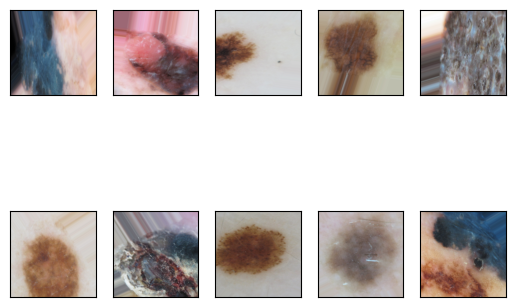

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [26]:
# Importaciones necesarias para usar Keras con TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Aquí van el resto de las importaciones necesarias para tu proyecto
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 como modelo base (sin usar TensorFlow Hub)
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [27]:
# Congelar las primeras capas del modelo base
mobilenetv2_base.trainable = False

In [28]:
# Crear un modelo de la red con MobileNetV2 como base
modelo = Sequential([
    mobilenetv2_base,
    GlobalAveragePooling2D(),
    Dense(2, activation='softmax')  # Nueva capa de salida
])


In [29]:
# Resumen del modelo
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
# Compilar el modelo utilizando la API de optimizadores de TensorFlow 2.x
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajuste de la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos para entrenamiento y validación
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de las imágenes serán de validación
)

# Directorio con las imágenes
ruta_datos = "datasetPruebaMEL_NV"

# Generador para entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generador para validación
data_gen_pruebas = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 650 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [32]:
# Fine-Tuning: Desbloquear las últimas capas de MobileNetV2
for layer in mobilenetv2_base.layers[-10:]:  # Ajustar el número de capas según el modelo
    layer.trainable = True

# Volver a compilar el modelo después de habilitar el fine-tuning
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajustar la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)


Epoch 1/50
21/21 [==============================] - 20s 886ms/step - loss: 0.7242 - accuracy: 0.5477 - val_loss: 0.7285 - val_accuracy: 0.5802
Epoch 2/50
21/21 [==============================] - 19s 904ms/step - loss: 0.6093 - accuracy: 0.6708 - val_loss: 0.6720 - val_accuracy: 0.6481
Epoch 3/50
21/21 [==============================] - 21s 1s/step - loss: 0.5367 - accuracy: 0.7262 - val_loss: 0.5995 - val_accuracy: 0.6914
Epoch 4/50
21/21 [==============================] - 22s 1s/step - loss: 0.4953 - accuracy: 0.7723 - val_loss: 0.5518 - val_accuracy: 0.7346
Epoch 5/50
21/21 [==============================] - 22s 1s/step - loss: 0.4391 - accuracy: 0.8262 - val_loss: 0.5483 - val_accuracy: 0.7346
Epoch 6/50
21/21 [==============================] - 22s 1s/step - loss: 0.4279 - accuracy: 0.8108 - val_loss: 0.5058 - val_accuracy: 0.7654
Epoch 7/50
21/21 [==============================] - 22s 1s/step - loss: 0.3767 - accuracy: 0.8600 - val_loss: 0.5228 - val_accuracy: 0.7407
Epoch 8/50
21/

acc = [0.5476922988891602, 0.670769214630127, 0.7261538505554199, 0.7723076939582825, 0.8261538743972778, 0.810769259929657, 0.8600000143051147, 0.8430769443511963, 0.8723077178001404, 0.8799999952316284, 0.8953846096992493, 0.8953846096992493, 0.8892307877540588, 0.8769230842590332, 0.8799999952316284, 0.9015384912490845, 0.8969230651855469, 0.8953846096992493, 0.9076923131942749, 0.8892307877540588, 0.8969230651855469, 0.8907692432403564, 0.9123076796531677, 0.8999999761581421, 0.9138461351394653, 0.8846153616905212, 0.9169231057167053, 0.8999999761581421, 0.9046154022216797, 0.9153845906257629, 0.9015384912490845, 0.892307698726654, 0.9061538577079773, 0.8984615206718445, 0.9138461351394653, 0.9092307686805725, 0.9030769467353821, 0.9076923131942749, 0.9200000166893005, 0.8907692432403564, 0.9169231057167053, 0.9153845906257629, 0.9153845906257629, 0.9169231057167053, 0.9076923131942749, 0.9092307686805725, 0.9184615612030029, 0.9107692241668701, 0.9215384721755981, 0.93384617567062

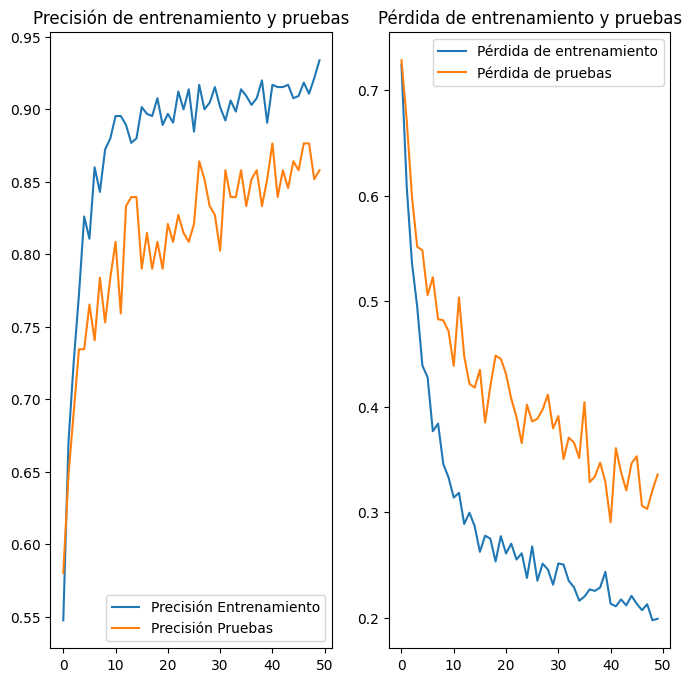

In [34]:
import os
import matplotlib.pyplot as plt
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [36]:
import requests
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Lista de clases, en el orden en que el modelo las espera
clases = ['MEL', 'NV']

def categorizar(url):
    # Solicitar la imagen desde la URL
    respuesta = requests.get(url)
    img_array = np.array(bytearray(respuesta.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    
    # Procesar la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    img = cv2.resize(img, (224, 224))  # Redimensionar la imagen para que se ajuste al tamaño de entrada del modelo
    img = img.astype(float) / 255.0  # Normalizar los valores de los píxeles entre 0 y 1
    
    # Realizar la predicción
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    
    # Obtener el índice de la clase con la mayor probabilidad
    indice_prediccion = np.argmax(prediccion[0], axis=-1)
    
    # Devolver la clase correspondiente (en lugar del índice)
    return clases[indice_prediccion]


In [76]:
import numpy as np
#0 = MEL, 1 = NV
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa3jzEoqWGX76cNpNnplh32l4ngkJTnNcTqQ&s' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 35ms/step
MEL
